# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

In [2]:
mall = pd.read_csv("F:\\PROGRAMMING\\Python\\ML\\Unsupervise ML\\Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
mall.shape

(200, 5)

In [5]:
del mall['CustomerID']
del mall['Gender']
del mall['Age']

In [6]:
mall.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


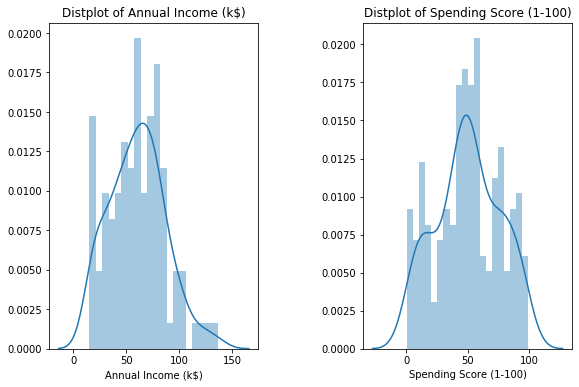

In [8]:
plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(mall[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

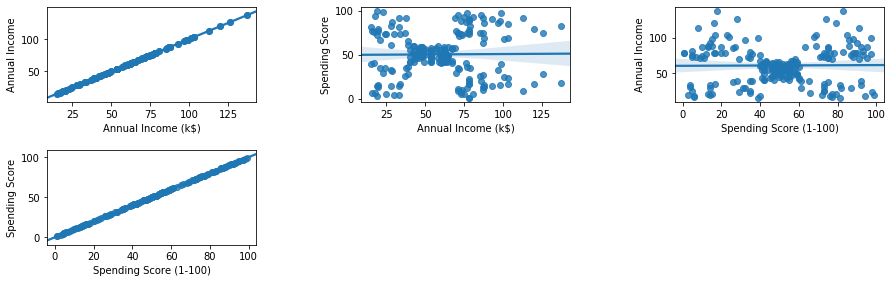

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Text(0, 0.5, 'Spending Score (1-100)')

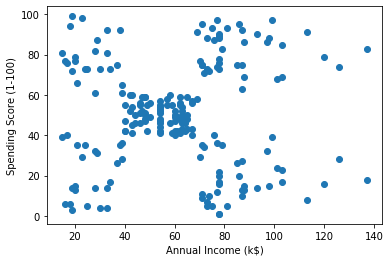

In [10]:
plt.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(mall[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

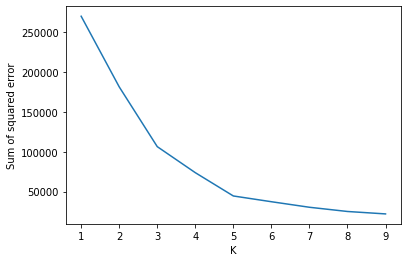

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
mall = np.array(mall)
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(mall)

In [14]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [15]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

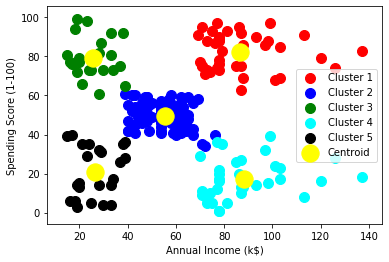

In [16]:
plt.scatter(mall[y_pred==0,0],mall[y_pred==0,1],s = 100, c='red',label = 'Cluster 1')
plt.scatter(mall[y_pred==1,0],mall[y_pred==1,1],s = 100, c='blue',label = 'Cluster 2')
plt.scatter(mall[y_pred==2,0],mall[y_pred==2,1],s = 100, c='green',label = 'Cluster 3')
plt.scatter(mall[y_pred==3,0],mall[y_pred==3,1],s = 100, c='cyan',label = 'Cluster 4')
plt.scatter(mall[y_pred==4,0],mall[y_pred==4,1],s = 100, c='black',label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300 , c='yellow' , label='Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [17]:
mall['Cluster'] = y_pred
mall.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
mall.to_csv('K-Means Clustering.csv',index=False)

# Hirerachical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [ ]:
mall_h = pd.read_csv("F:\\PROGRAMMING\\Python\\ML\\Unsupervise ML\\Mall_Customers.csv")
mall_h.head()

In [ ]:
del mall_h['CustomerID']
del mall_h['Gender']
del mall_h['Age']

In [ ]:
mall_h.head()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(mall_h, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
mall_h = np.array(mall_h)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
pred_h = cluster.fit_predict(mall_h)

In [ ]:
pred_h

In [ ]:
plt.scatter(mall_h[pred_h==0,0],mall_h[pred_h==0,1],s = 100, c='red',label = 'Cluster 1')
plt.scatter(mall_h[pred_h==1,0],mall_h[pred_h==1,1],s = 100, c='blue',label = 'Cluster 2')
plt.scatter(mall_h[pred_h==2,0],mall_h[pred_h==2,1],s = 100, c='green',label = 'Cluster 3')
plt.scatter(mall_h[pred_h==3,0],mall_h[pred_h==3,1],s = 100, c='cyan',label = 'Cluster 4')
plt.scatter(mall_h[pred_h==4,0],mall_h[pred_h==4,1],s = 100, c='black',label = 'Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()